In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
from lv import *
from binned_analysis import *
from global_variables import *
import matplotlib.pyplot as plt

In [41]:
Rbin_width = 30 # m
Rbins = np.linspace(0,RADIUS,int(RADIUS/Rbin_width))
Ebins = np.linspace(Emuon/10,Emuon,10)
c_range = np.logspace(-29.2,-26.8,40)
a_range = np.logspace(-25.3,-23,40)*1e9

In [37]:
# c terms


dcsq_cet = {exp:[] for exp in experiment_list}
print("cet")
for cet in c_range:
    result = get_delta_chisquare_for_LV_case(Rbins,Ebins,cet=cet)
    for exp in experiment_list:
        dcsq_cet[exp].append(result[exp])
        
dcsq_ceu = {exp:[] for exp in experiment_list}
print("ceu")
for ceu in c_range:
    result = get_delta_chisquare_for_LV_case(Rbins,Ebins,ceu=ceu)
    for exp in experiment_list:
        dcsq_ceu[exp].append(result[exp])

print("cut")
dcsq_cut = {exp:[] for exp in experiment_list}
for cut in c_range:
    result = get_delta_chisquare_for_LV_case(Rbins,Ebins,cut=cut)
    for exp in experiment_list:
        dcsq_cut[exp].append(result[exp])

cet
ceu
cut


In [42]:
# a terms

dcsq_aet = {exp:[] for exp in experiment_list}
print("aet")
for aet in a_range:
    result = get_delta_chisquare_for_LV_case(Rbins,Ebins,aet=aet)
    for exp in experiment_list:
        dcsq_aet[exp].append(result[exp])
        
dcsq_aeu = {exp:[] for exp in experiment_list}
print("aeu")
for aeu in a_range:
    result = get_delta_chisquare_for_LV_case(Rbins,Ebins,aeu=aeu)
    for exp in experiment_list:
        dcsq_aeu[exp].append(result[exp])

print("aut")
dcsq_aut = {exp:[] for exp in experiment_list}
for aut in a_range:
    result = get_delta_chisquare_for_LV_case(Rbins,Ebins,aut=aut)
    for exp in experiment_list:
        dcsq_aut[exp].append(result[exp])

aet
aeu
aut


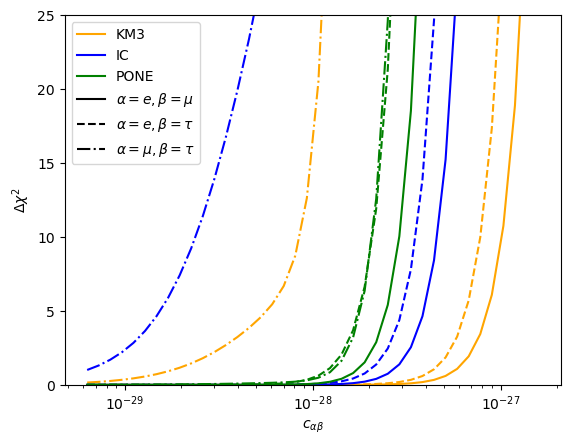

In [43]:
exp_colors = {"IC":"blue",
              "KM3":"orange",
              "PONE":"green"}

for exp in experiment_list:
    plt.plot(c_range,dcsq_ceu[exp],color=exp_colors[exp],label=exp)
    plt.plot(c_range,dcsq_cet[exp],color=exp_colors[exp],ls="--")
    plt.plot(c_range,dcsq_cut[exp],color=exp_colors[exp],ls="-.")
plt.plot([],[],color="black",ls="-",label=r"$\alpha = e, \beta = \mu$")
plt.plot([],[],color="black",ls="--",label=r"$\alpha = e, \beta = \tau$")
plt.plot([],[],color="black",ls="-.",label=r"$\alpha = \mu, \beta = \tau$")
plt.semilogx()
plt.legend()
plt.ylim(0,25)
plt.xlabel(r"$c_{\alpha \beta}$")
plt.ylabel(r"$\Delta \chi^2$")
plt.show()

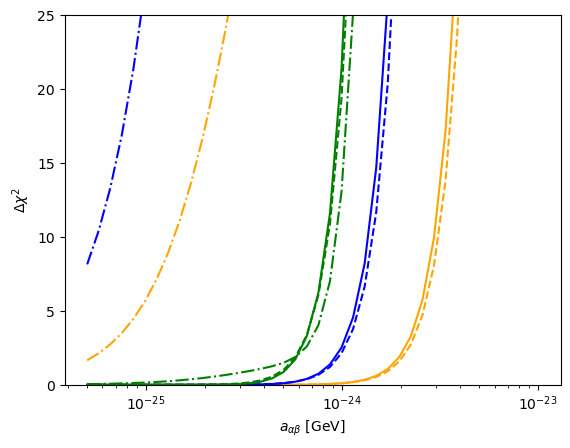

In [46]:
for exp in experiment_list:
    plt.plot(a_range/1e9,dcsq_aeu[exp],color=exp_colors[exp],label=exp)
    plt.plot(a_range/1e9,dcsq_aet[exp],color=exp_colors[exp],ls="--")
    plt.plot(a_range/1e9,dcsq_aut[exp],color=exp_colors[exp],ls="-.")
plt.plot([],[],color="black",ls="-",label=r"$\alpha = e, \beta = \mu$")
plt.plot([],[],color="black",ls="--",label=r"$\alpha = e, \beta = \tau$")
plt.plot([],[],color="black",ls="-.",label=r"$\alpha = \mu, \beta = \tau$")
plt.semilogx()
plt.ylim(0,25)
plt.xlabel(r"$a_{\alpha \beta}$ [GeV]")
plt.ylabel(r"$\Delta \chi^2$")
plt.show()